<h3>Уравнение для анализа</h3>

In [6]:
display(y)

x**5 + 2*x**4 + 5*x**3 + 8*x**2 - x - 3

Для локализации мы смотрим промежутки возрастания и убывания (найденные с помощью производной) и проверяем на каждом наличие корня. Для этого достаточно того, чтобы либо значение функции в левой границе было нулём, либо значения были разных знаков. Мы знаем, что будет единственный корень на этом промежутке, так как он монотонный. Тогда корень можно найти методом Ньютона. 
<p>
В качестве бесконечности взяли $10^5$. Так как $y(10^5) > 0$, корни производной примерно $-1,29$ и $0,06$, и $y'(10^5) > 0$. Наша функция непрерывна, поэтому после "бесконечности" корней точно не будет. Аналогично и отрицательная бесконечность $-10^5$. $y(-10^5) < 0$ и $y'(-10^5) > 0$.

<h3>График уравнения</h3>

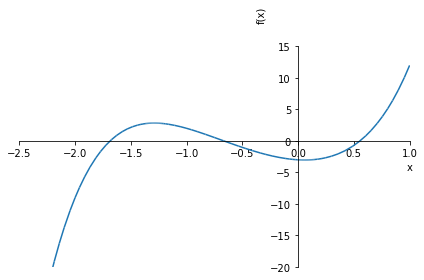

In [8]:
display(plot(y, (x, -2.5, 1.0), ylim=[-20, 20]))

<h3>Корни уравнения</h3>

In [9]:
display(roots)

[-1.68605466239665, -0.666021897044982, 0.554554429143766]

<h3>Локализация корней</h3>

In [10]:
display([{'l': seg[0], 'r': seg[1]} for seg in sol[2]])

[{'l': -100000.0, 'r': -1.29022829728533},
 {'l': -1.29022829728533, 'r': 0.0591165490773438},
 {'l': 0.0591165490773438, 'r': 100000.0}]

<h3>Полученные корни методом Ньютона</h3>

In [11]:
display(sol[0])

[-1.68605466250080, -0.666021902922307, 0.554554429497462]

<h3>Максимальная относительняа погрешность</h3>

In [25]:
display(max([abs((sol[0][i] - roots[i]) / roots[i]) for i in range(len(roots))]))

8.82452228244335e-9

In [1]:
from sympy import Symbol
from sympy.solvers import solveset
from sympy.plotting import plot

In [2]:
x = Symbol('x')
a, b, c, d, e, f = 1, 2, 5, 8, -1, -3
y = a * x**5 + b * x**4 + c * x**3 + d * x**2 + e * x + f
roots = sorted(list(map(lambda i: i.evalf(), filter(lambda i: i.is_real, solveset(y, x)))))

In [23]:
def newton_method(y, l, r, eps=10**(-4)):
    m = (l + r) / 2.0
    m_num = y.subs(x, m)
    cnt = 0
    while (abs(m_num) > eps):
        m -= m_num / y.diff().subs(x, m)
        m_num = y.subs(x, m)
        cnt += 1
    return (m, cnt)

In [14]:
def find_solutions(y, p, inf=1e5):
    if p <= 2:
        return (sorted(list(map(lambda i: i.evalf(), filter(lambda i: i.is_real, solveset(y, x))))), 0, [])
    sign = lambda x: 1 if x >= 0 else -1
    fs = find_solutions(y.diff(), p - 1)
    xs = [-inf] + fs[0] + [inf]    
    segments, roots, cnt = [], [], fs[1]
    for i in range(len(xs) - 1):
        l, r = xs[i:i+2]
        yl, yr = y.subs(x, l), y.subs(x, r)
        if yr != 0 and (yl == 0 or sign(yl) != sign(yr)):
            ans = newton_method(y, l, r)
            segments += [(l, r)]
            roots += [ans[0]]
            cnt += ans[1]
    return (roots, cnt, segments)

In [24]:
sol = find_solutions(y, 5)